<a href="https://colab.research.google.com/github/nadrowskyy/otomoto-scrap-analize/blob/main/otomoto_analyze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#### Plik z danymi aukcji z portalu Otomoto został umieszczony na githubie skąd będzie odczytywany do dalszej analizy

In [ ]:
file = 'https://raw.githubusercontent.com/nadrowskyy/otomoto-scrap-analize/main/all_cars.csv'

In [ ]:
df = pd.read_csv(file, low_memory=False, parse_dates=['Pierwsza rejestracja', 'Data dodania'])

#### Lista dostępnych kolumn w pliku prezentuje się następująco:

In [ ]:
df.columns.tolist()

['ID',
 'Marka',
 'Model',
 'Miasto',
 'Wojewodztwo',
 'Moc',
 'Poj. sil',
 'Cena',
 'Waluta',
 'Kraj poch.',
 'Czy zabytek',
 'Czy zarej. w Polsce',
 'Czy bezwypadkowy',
 'Czy Anglik',
 'Serwisowany w ASO',
 'Filtr DPF',
 'Generacja',
 'Rok prod.',
 'Pierwsza rejestracja',
 'Przebieg',
 'Oferta od',
 'Czy leasing',
 'Rodzaj paliwa',
 'Emisja CO2',
 'Typ',
 'Kolor',
 'Stan',
 'Czy pierwsz. właśc',
 'Napęd',
 'Skrzynia biegów',
 'Data dodania',
 'Link']

In [ ]:
# konwertowanie kolumny Cena do wartości liczbowych, wcześniej wartości były stringami(object) i występowały błędy
df['Cena'] = pd.to_numeric(df['Cena'], errors='coerce')

In [ ]:
df['ID'] = df['ID'].convert_dtypes()  # konwertowanie wartości z kolumny ID aby wyświetlały się prawidłowo

#### Koniecznym jest odrzucenie aukcji, które się powtarzają oraz tych które nie mają wartości w kolumnie ID.

In [ ]:
df.drop_duplicates(subset=['ID'], keep=False)
df.dropna(subset=['ID'], inplace=True)

#### Procentowy udział cech we wszystkich ogłoszeniach. Cena występuje w 99.93% aukcji ale zważywszy na to, że będziemy analizować ceny aut konieczne będzie odrzucenie ogłoszeń gdzie nie jest ona podana.

In [ ]:
df.count() / len(df) * 100

ID                      100.000000
Marka                    99.994347
Model                    99.994347
Miasto                   99.993405
Wojewodztwo              99.993405
Moc                      99.559569
Poj. sil                 99.039059
Cena                     99.932640
Waluta                   99.993405
Kraj poch.               57.585778
Czy zabytek              99.993405
Czy zarej. w Polsce      48.265125
Czy bezwypadkowy         57.156652
Czy Anglik                0.219980
Serwisowany w ASO        44.099636
Filtr DPF                 7.076574
Generacja                70.958397
Rok prod.                99.993405
Pierwsza rejestracja     40.276129
Przebieg                 99.551090
Oferta od                99.993405
Czy leasing              15.696776
Rodzaj paliwa            99.993405
Emisja CO2               44.270156
Typ                      99.993405
Kolor                    99.993405
Stan                     99.993405
Czy pierwsz. właśc       32.110489
Napęd               

In [ ]:
df.dropna(subset=['Cena'], inplace=True)

In [ ]:
df.shape  # wymiary ramki danych, 212149 rekordów, 32 kolumny

(212149, 32)

In [ ]:
df

,ID,Marka,Model,Miasto,Wojewodztwo,Moc,Poj. sil,Cena,Waluta,Kraj poch.,Czy zabytek,Czy zarej. w Polsce,Czy bezwypadkowy,Czy Anglik,Serwisowany w ASO,Filtr DPF,Generacja,Rok prod.,Pierwsza rejestracja,Przebieg,Oferta od,Czy leasing,Rodzaj paliwa,Emisja CO2,Typ,Kolor,Stan,Czy pierwsz. właśc,Napęd,Skrzynia biegów,Data dodania,Link
0,6084032404,abarth,124,Elbląg,Warmińsko-mazurskie,170.0,1368.0,104999.0,PLN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,2018.0,NaN,20000.0,Osoby prywatnej,NaN,Benzyna,NaN,Kabriolet,Czarny,Używane,NaN,NaN,Manualna,2021-04-07 15:26:00,https://www.otomoto.pl/oferta/abarth-124-abart...
1,6083911812,abarth,500,Wągrowiec,Wielkopolskie,145.0,1368.0,69900.0,PLN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,2018.0,NaN,19000.0,Firmy,NaN,Benzyna,139.0,Auta małe,Biały,Używane,NaN,Na przednie koła,Manualna,2021-04-12 15:08:00,https://www.otomoto.pl/oferta/abarth-500-abart...
2,6083978833,abarth,500,Warszawa,Mazowieckie,140.0,1368.0,48900.0,PLN,NaN,False,False,True,NaN,True,NaN,NaN,2011.0,2011-02-04 00:00:00,110000.0,Firmy,NaN,Benzyna,NaN,Auta małe,Szary,Używane,NaN,Na przednie koła,Automatyczna,2021-04-12 12:46:00,https://www.otomoto.pl/oferta/abarth-500-abart...
3,6080145032,abarth,500,Szamotuły,Wielkopolskie,180.0,1398.0,46900.0,PLN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,2015.0,NaN,150659.0,Firmy,NaN,Benzyna,NaN,Auta małe,Czerwony,Używane,NaN,Na przednie koła,Automatyczna,2021-04-10 16:11:00,https://www.otomoto.pl/oferta/abarth-500-bardz...
4,6080419505,abarth,500,Gorlice,Małopolskie,185.0,1368.0,49900.0,PLN,Stany Zjednoczone,False,False,True,NaN,NaN,NaN,NaN,2015.0,NaN,22500.0,Osoby prywatnej,NaN,Benzyna,NaN,Auta małe,Żółty,Używane,NaN,Na przednie koła,Automatyczna,2021-04-09 10:33:00,https://www.otomoto.pl/oferta/abarth-500-abart...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212902,6084195363,zuk,other,Włocławek,Kujawsko-pomorskie,70.0,2120.0,10900.0,PLN,Polska,False,NaN,True,NaN,NaN,NaN,NaN,1970.0,NaN,63518.0,Osoby prywatnej,NaN,Benzyna,NaN,Kombi,Inny kolor,Używane,NaN,Na tylne koła,Manualna,2021-04-12 14:43:00,https://www.otomoto.pl/oferta/zuk-zuk-a15-smut...
212903,6084139185,zuk,other,Pobierowo,Zachodniopomorskie,61.0,2417.0,2500.0,PLN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,1991.0,1991-09-18 00:00:00,60000.0,Osoby prywatnej,NaN,Diesel,NaN,SUV,Zielony,Używane,NaN,NaN,Manualna,2021-04-12 10:56:00,https://www.otomoto.pl/oferta/zuk-sprzedam-zuk...
212904,6082968006,zuk,other,Złotów,Wielkopolskie,60.0,2120.0,6900.0,PLN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,1977.0,1977-06-11 00:00:00,11880.0,Osoby prywatnej,NaN,Benzyna,NaN,SUV,Czerwony,Używane,NaN,NaN,Manualna,2021-04-08 17:32:00,https://www.otomoto.pl/oferta/zuk-ID6DFwRc.htm...
212905,6075025974,zuk,other,Koszalin,Zachodniopomorskie,70.0,2120.0,11900.0,PLN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,1985.0,NaN,20056.0,Firmy,NaN,Benzyna,NaN,Minivan,Czerwony,Używane,NaN,NaN,Manualna,2021-04-05 11:57:00,https://www.otomoto.pl/oferta/zuk-straz-pozarn...


In [ ]:
df.isna().sum()  # ile wartości jest NULL dla każdej kolumny, dla ID jest 0 bo wcześniej usunęliśmy wartości null

ID                           0
Marka                        0
Model                        0
Miasto                       0
Wojewodztwo                  0
Moc                        921
Poj. sil                  2023
Cena                         0
Waluta                       0
Kraj poch.               89946
Czy zabytek                  0
Czy zarej. w Polsce     109738
Czy bezwypadkowy         90925
Czy Anglik              211682
Serwisowany w ASO       118573
Filtr DPF               197139
Generacja                61586
Rok prod.                    0
Pierwsza rejestracja    126682
Przebieg                   939
Oferta od                    0
Czy leasing             178888
Rodzaj paliwa                0
Emisja CO2              118231
Typ                          0
Kolor                        0
Stan                         0
Czy pierwsz. właśc      144024
Napęd                    15196
Skrzynia biegów            754
Data dodania                 0
Link                         0
dtype: i

#### Wykres ilości aut w zależności od marki

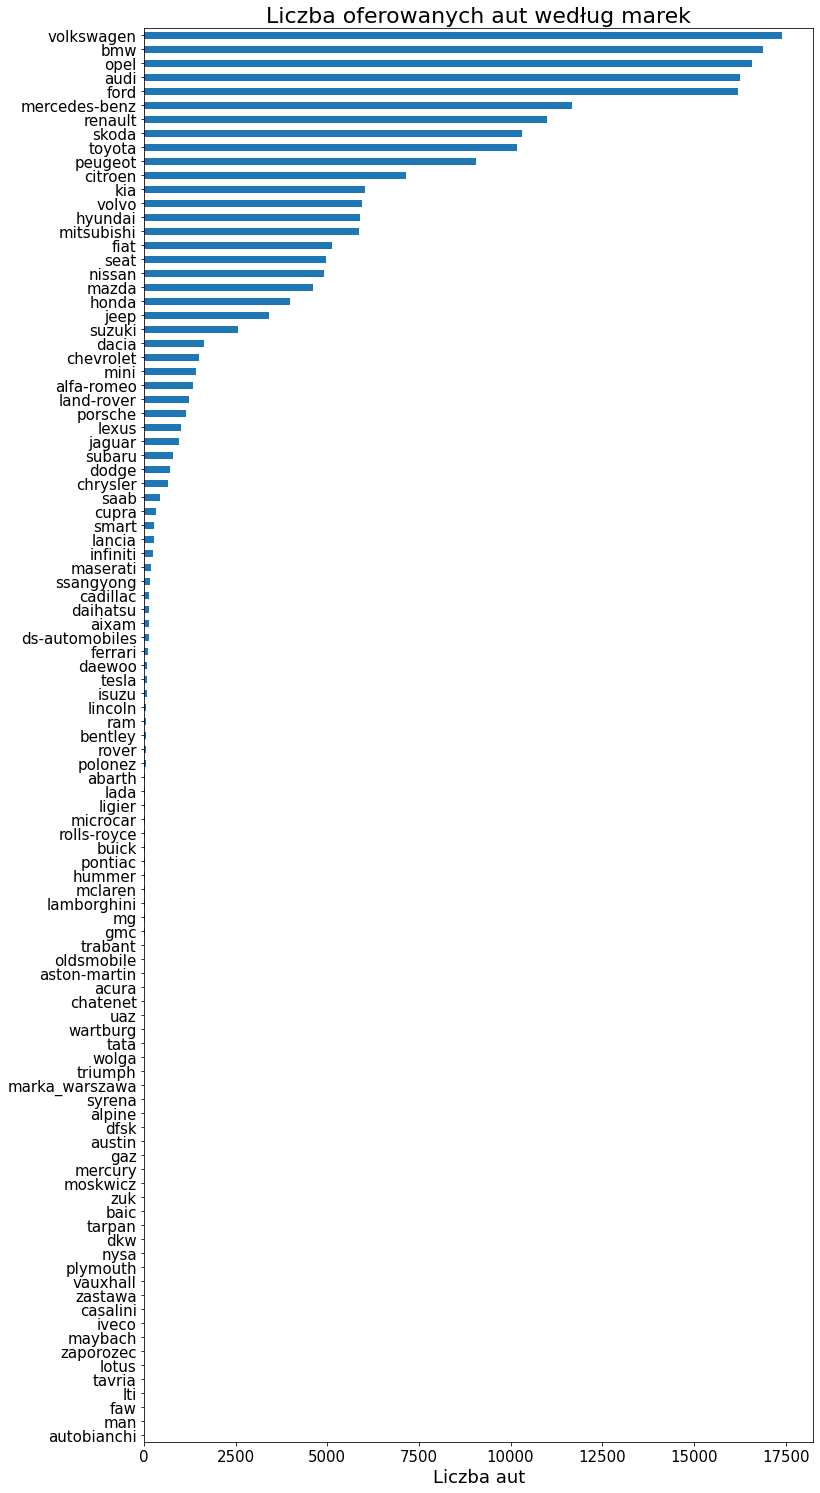

In [ ]:
plot1 = df['Marka'].value_counts(ascending=True).plot(kind='barh', figsize=(12,26), fontsize=15, title='Liczba oferowanych aut według marek')
plot1.set_xlabel("Liczba aut", fontsize=18)
plot1.title.set_size(22)

Procentowy udział marek w ogłoszeniach (TOP10).

In [ ]:
df['Marka'].value_counts(normalize=True).nlargest(10) * 100  # tutaj jeszcze do poprawy żeby ładnie były wyświetlone procenty

volkswagen       8.197069
bmw              7.961857
opel             7.823747
audi             7.661125
ford             7.639442
mercedes-benz    5.502265
renault          5.181735
skoda            4.857435
toyota           4.796157
peugeot          4.271055
Name: Marka, dtype: float64